## Calculus
### limits

Note: for interactive work it is useful to run `init_session()`, which defines some basic symbols

In [1]:
from sympy import *
init_session()
%matplotlib inline

IPython console for SymPy 1.10.1 (Python 3.9.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



In [2]:
limit(sin(x)/x, x, 0)

In [3]:
limit(1/x, x, 0)

Limits are from the right by default. It can be changed with `dir` argument:

In [3]:
limit(1/x, x, 0, dir="-")

In [4]:
limit(1/x, x, 0, dir="+-")

ValueError: The limit does not exist since left hand limit = -oo and right hand limit = oo

We may also create an expression with the limit without evaluating it

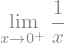

In [6]:
Limit(1/x, x, 0, dir="+")

and evaluate later if needed

In [7]:
_.doit()

#### Differentiation

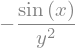

In [9]:
diff(sin(x)/x, x)

Multiple and multivariate derivatives are possible

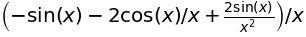

In [8]:
diff(sin(x)/x, x, x)

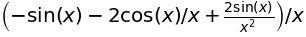

In [9]:
diff(sin(x)/x, x, 2)

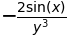

In [10]:
diff(sin(x)/y, x, 2, y, 2)

Unevaluated derivatives are useful for expressing differential equations

In [13]:
aa = Derivative(sin(x)/y, x, 2, y, 2)

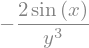

In [14]:
aa.doit()

#### Series expansion

In [12]:
exp(x).series()

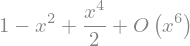

In [16]:
expr = exp(sin(x**2+pi))
expr.series(x)

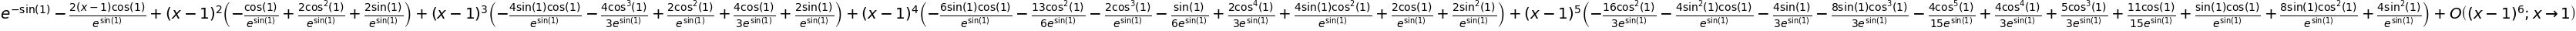

In [14]:
expr.series(x, 1)

Lets compare the original function with its series expansion visually

### Plotting side-note $\to$

In [17]:
expr

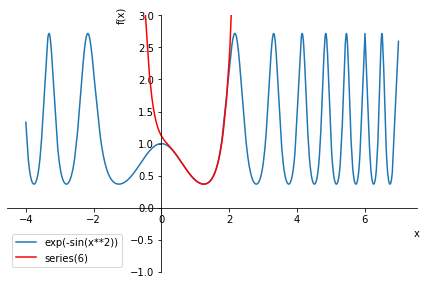

In [19]:
p1 = plot(expr, expr.series(x, 1, 7).removeO(), (x, -4, 7),
    ylim = (-1,3),
    show = False,
    legend = True
)
p1[1].line_color="r"
p1[1].label="series(6)"
p1.show()

### ODE solving

In [16]:
f, g = symbols('f, g', cls=Function)

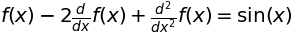

In [17]:
eqn = Eq(f(x).diff(x),-k*x- b*f(x).diff(x))
eqn

In [18]:
sol = dsolve(eqn, f(x))
sol

We can test that the solution is valid

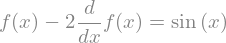

In [22]:
k, b, x,y,t = symbols('k, b,x,y,t')

k, b = symbols('x, t', cls=Function)

# eqn = Eq((x).diff(t) - 2*f(x).diff(x) + f(x), sin(x))
# eqn

In [19]:
eqn.subs(f(x), sol.args[1]).doit()

Systems of equations are also supported

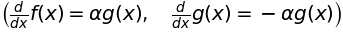

In [20]:
alpha = symbols("alpha", positive=True)
eqn = Eq(f(x).diff(x), alpha*g(x)), Eq(g(x).diff(x), -alpha*g(x))
eqn

In [21]:
dsolve(eqn, (f(x), g(x)))